<a href="https://colab.research.google.com/github/luisoliverph-web/Examen/blob/main/Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub[pandas-datasets]


In [ ]:
from google.colab import files
files.upload()  # Sube tu archivo kaggle.json

Saving tmdb_2025.csv to tmdb_2025.csv


{'tmdb_2025.csv': b'id,title,original_language,release_date,genre_ids,popularity,vote_average,vote_count\r\n278,The Shawshank Redemption,en,23-09-1994,"[18, 80]",32.1474,8.712,28545\r\n238,The Godfather,en,14-03-1972,"[18, 80]",30.5478,8.687,21622\r\n803796,KPop Demon Hunters,en,20-06-2025,"[16, 14, 28, 35, 10402, 10751]",209.9239,8.613,620\r\n240,The Godfather Part II,en,20-12-1974,"[18, 80]",15.8952,8.571,13054\r\n424,Schindler\'s List,en,15-12-1993,"[18, 36, 10752]",20.7912,8.566,16540\r\n389,12 Angry Men,en,10-04-1957,[18],21.5047,8.549,9245\r\n129,Spirited Away,ja,20-07-2001,"[16, 10751, 14]",16.4039,8.5,17279\r\n155,The Dark Knight,en,16-07-2008,"[18, 28, 80, 53]",26.7415,8.522,34068\r\n19404,Dilwale Dulhania Le Jayenge,hi,20-10-1995,"[35, 18, 10749]",6.4532,8.518,4496\r\n497,The Green Mile,en,10-12-1999,"[14, 18, 80]",16.3238,8.504,18203\r\n496243,Parasite,ko,30-05-2019,"[35, 53, 18]",21.9498,8.499,19239\r\n680,Pulp Fiction,en,10-09-1994,"[53, 80, 35]",17.655,8.489,28848\r\n122,

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Configurar el path del archivo (vacío si no quieres especificar uno)
file_path = "tmdb_2025.csv"

# Cargar el dataset usando KaggleHub
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abhisheknishad8988/tmdb-top-rated-movies-with-genre-and-metadata",  # Dataset en Kaggle
  file_path,
)

# Mostrar los primeros 5 registros del dataset
print("Primeros 5 registros:", df.head())

/tmp/ipython-input-3767072524.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 726k/726k [00:00<00:00, 1.37MB/s]

Primeros 5 registros:        id                     title original_language release_date  \
0     278  The Shawshank Redemption                en   23-09-1994   
1     238             The Godfather                en   14-03-1972   
2  803796        KPop Demon Hunters                en   20-06-2025   
3     240     The Godfather Part II                en   20-12-1974   
4     424          Schindler's List                en   15-12-1993   

                        genre_ids  popularity  vote_average  vote_count  
0                        [18, 80]     32.1474         8.712       28545  
1                        [18, 80]     30.5478         8.687       21622  
2  [16, 14, 28, 35, 10402, 10751]    209.9239         8.613         620  
3                        [18, 80]     15.8952         8.571       13054  
4                 [18, 36, 10752]     20.7912         8.566       16540  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Filtrar los datos, eliminando filas con valores nulos
df = df.dropna()

# Seleccionar las columnas relevantes para el modelo (por ejemplo, 'budget' y 'vote_average')
X = df[['popularity', 'vote_average']]  # Características
y = df['popularity'] > 50  # Variable objetivo: si la popularidad es mayor a 50, predecimos 'True'

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Precisión del modelo: 1.0


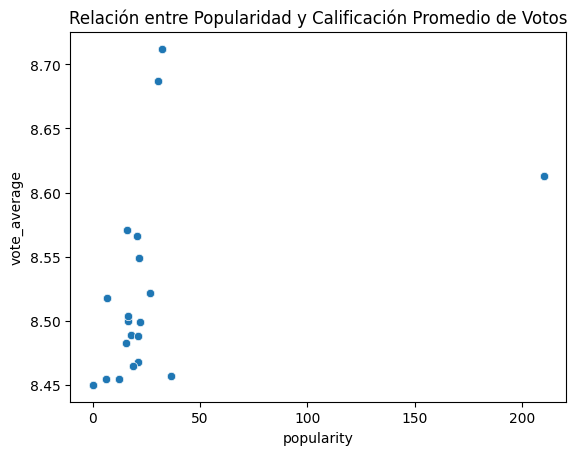

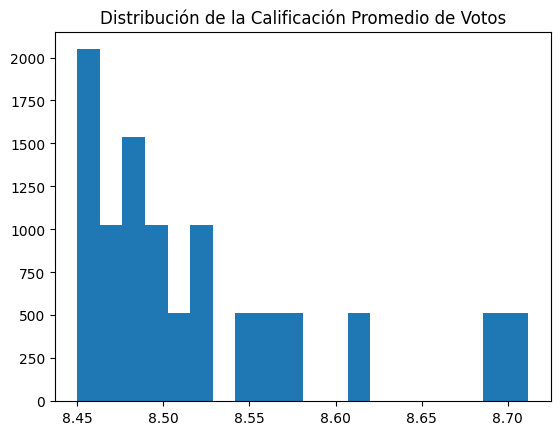

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión entre presupuesto y popularidad
sns.scatterplot(x='popularity', y='vote_average', data=df)
plt.title("Relación entre Popularidad y Calificación Promedio de Votos")
plt.show()

# Histograma de la columna 'vote_average'
plt.hist(df['vote_average'], bins=20)
plt.title("Distribución de la Calificación Promedio de Votos")
plt.show()